In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
df_tesla=pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-20,52.910000,51.764000,52.119999,52.383999,18071500.0,52.383999
2017-03-21,52.959999,50.048000,52.566002,50.136002,34543000.0,50.136002
2017-03-22,51.014000,50.102001,50.312000,51.001999,20296500.0,51.001999
2017-03-23,51.534000,50.660000,51.077999,50.956001,16601000.0,50.956001
2017-03-24,52.778000,51.001999,51.139999,52.632000,28236500.0,52.632000
...,...,...,...,...,...,...
2022-03-11,843.799988,793.770020,840.200012,795.349976,22272800.0,795.349976
2022-03-14,800.700012,756.039978,780.609985,766.369995,23717400.0,766.369995
2022-03-15,805.570007,756.570007,775.270020,801.890015,22280400.0,801.890015


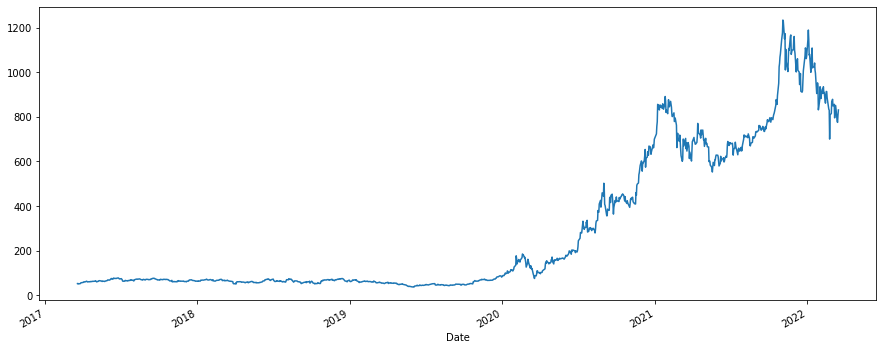

In [ ]:
# Simple moving average ----> for smoothing the graph
df_tesla['Open'].plot(figsize=(15,6))

In [ ]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=5,min_periods=1).mean()

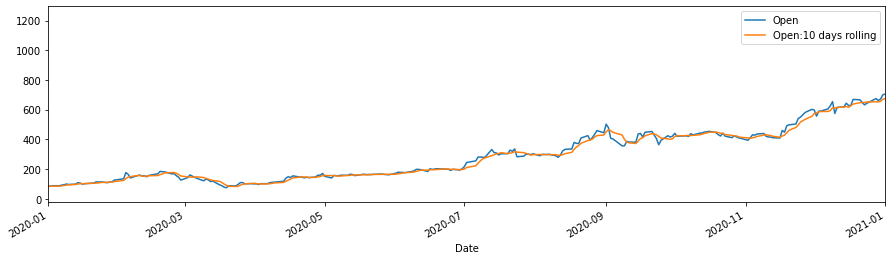

In [ ]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,4))

In [ ]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

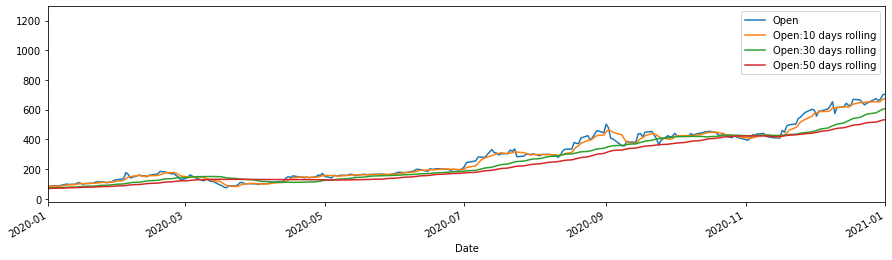

In [ ]:
df_tesla[['Open','Open:10 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,4))

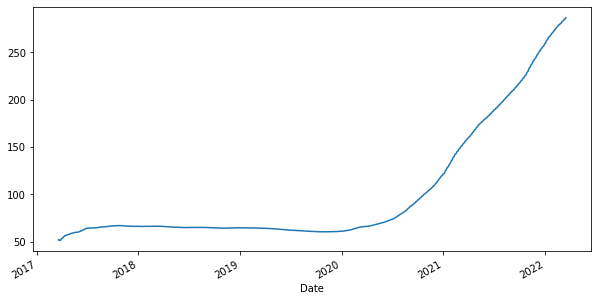

In [ ]:
# Expanding
# CMA
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [ ]:
# EMA tesla shares
# Let's smoothing factor - 0.1
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

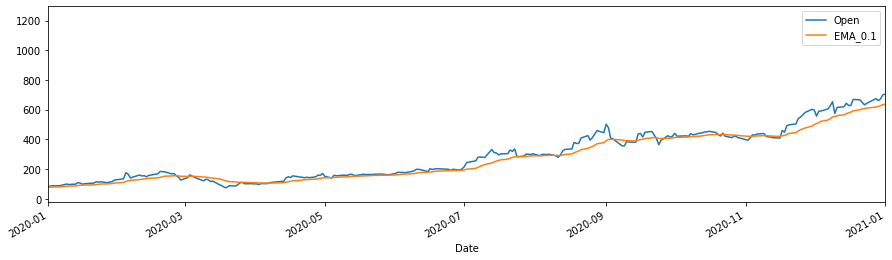

In [ ]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,4))

In [ ]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

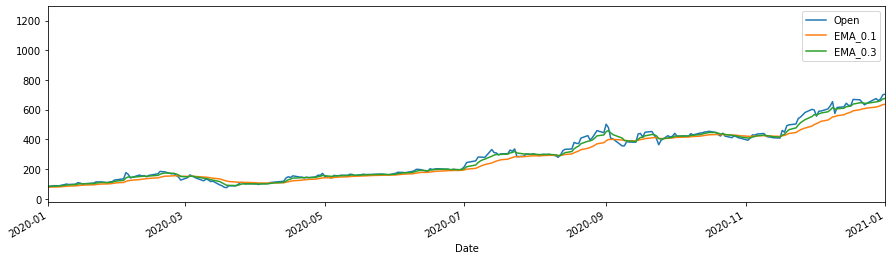

In [ ]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,4))

In [ ]:
# EWMA
df_tesla['EWMA_5days']=df_tesla['Open'].ewm(span=5).mean()

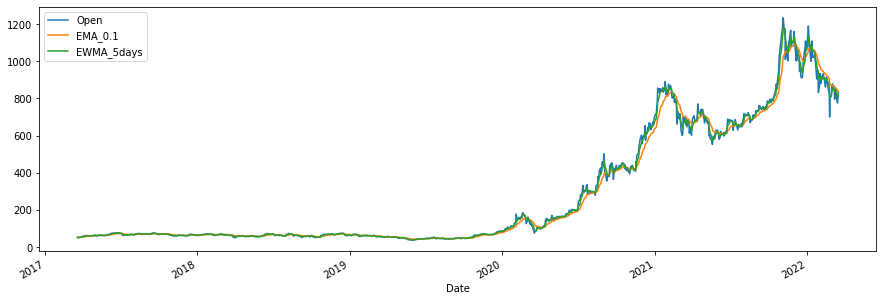

In [ ]:
df_tesla[['Open','EMA_0.1','EWMA_5days']].plot(figsize=(15,5))